In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an iterator that reads the dataset in chunks of 100000 rows at a time
nft_ds = pd.read_csv('datasets/nfts/nft_trades.csv', chunksize=100000)

# Concatenate the chunks into a single DataFrame
nft_df = pd.concat(nft_ds)

# Get and print the first 5 rows of the DataFrame in a neatly formatted table
nft_df.head()

/var/folders/z0/w05phkg900j6dsx_95__2tz80000gn/T/ipykernel_3928/1543765585.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_df = pd.concat(nft_ds)


,date,transaction_hash,num_items,seller,buyer,token_id,avg_price,currency,usd_amount,platform
0,2021-11-24 09:53:15,0x8bc65ea36c55ce961423ef9fa866bc5990958c52be74...,9,0xecfd7e04175e6d9c077bddfdb1ba680c2093b04a,0xb1a5b42808c2140804f5ce2e2dd2be0cee828513,53151,3.333,ETH,129328.2000,OpenSea
1,2021-11-24 09:53:15,0x8bc65ea36c55ce961423ef9fa866bc5990958c52be74...,9,0xecfd7e04175e6d9c077bddfdb1ba680c2093b04a,0xb1a5b42808c2140804f5ce2e2dd2be0cee828513,53561,3.333,ETH,129328.2000,OpenSea
2,2021-11-24 09:57:10,0x51029aaf1469a34b164c56083eeb29279b2ce48a3efd...,1,0x6e4412105de91f33fbea0719766e1ea9121685bf,0x44bdb0515b3335f92e55219b42fe4c4160f919c0,29517,9.990,ETH,42770.5866,OpenSea
3,2021-11-24 09:57:25,0x38c8c554618ca9e65cd3882f1711be255d519a719bba...,1,0x21ea65bb12bb9d2b776b2efc1406a5781bf8dbf8,0xee033ebb259b742de5c505e3eecf8a880cc52296,38953,3.500,ETH,14984.6900,OpenSea
4,2021-11-24 09:57:35,0xa2865da9542f3927b3fc591b183c9eddad16892062bc...,1,0xf3e7ff0344ffbcca39750810c4e12aeb159a99cc,0x44bdb0515b3335f92e55219b42fe4c4160f919c0,107532,4.900,ETH,20978.5660,OpenSea


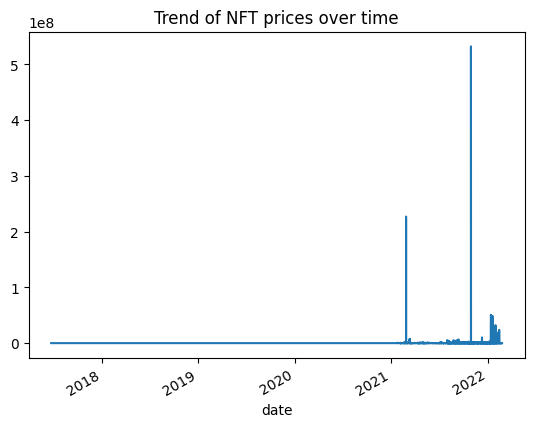

In [17]:
# Convert the 'date' column to datetime
nft_df['date'] = pd.to_datetime(nft_df['date'])

# Set 'date' as the index of the DataFrame
nft_df.set_index('date', inplace=True)

# Create the plot
nft_df['usd_amount'].plot()

# Add a title to the plot
plt.title('Trend of NFT prices over time')

# Display the plot
plt.show()